In [14]:
from importlib import reload
import Class
import Segment
reload(Class)
reload(Segment)
from Class import SpatialCompetitionModel, Firm
from Segment import LinearModel
from Cube import CubeModel
import matplotlib.pyplot as plt

import numpy as np
import numpy.typing as npt

In [15]:
def creatAggregation(N, c, beta):
    price = c + N/(beta * (N-1))
    return [Firm(np.array([1/2]), price) for _ in range(N)]

In [16]:
N=3
beta=5.0  # Higher beta means sharper market share boundaries
cost=1.0  # Production cost
pi=1.0    # PPP intensity
model = LinearModel(
    N=N, beta=beta, cost=cost, pi=pi,
    firms=creatAggregation(N, cost, beta)
)
model

LinearModel(beta=5.0, cost=1.0

Firms:
  1: position=0.500, price=1.300
  2: position=0.500, price=1.300
  3: position=0.500, price=1.300
)

In [17]:
model.best_response(firm_index=1)

(array([0.5]), 1.3)

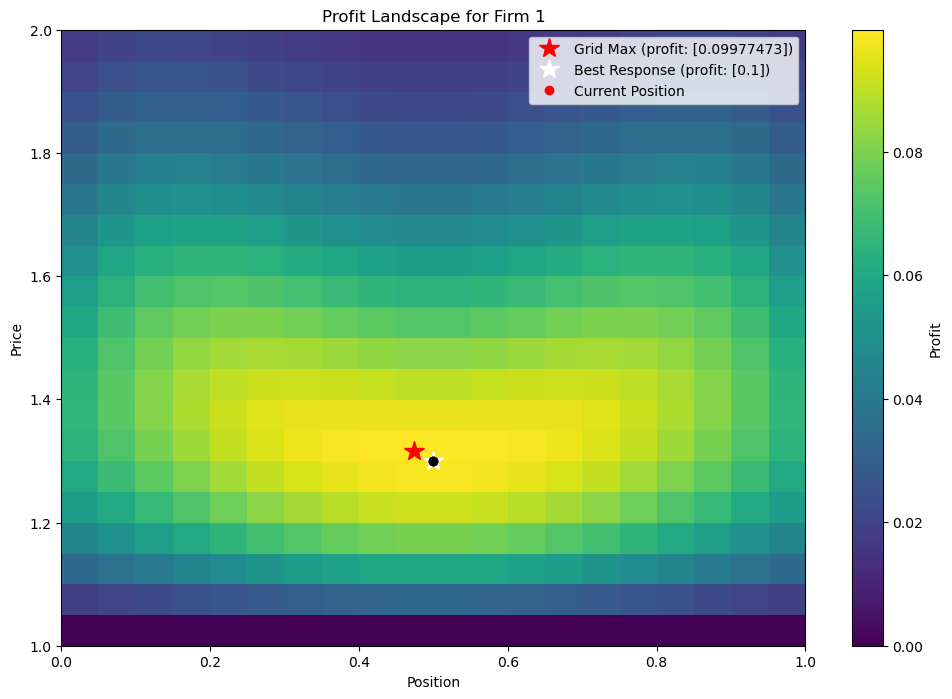

{'grid_search': {'position': 0.47368421052631576,
  'price': 1.3157894736842106,
  'profit': array([0.09977473])},
 'best_response': {'position': 0.5, 'price': 1.3, 'profit': array([0.1])}}

In [18]:
model.response_graph(0, num_points=20)

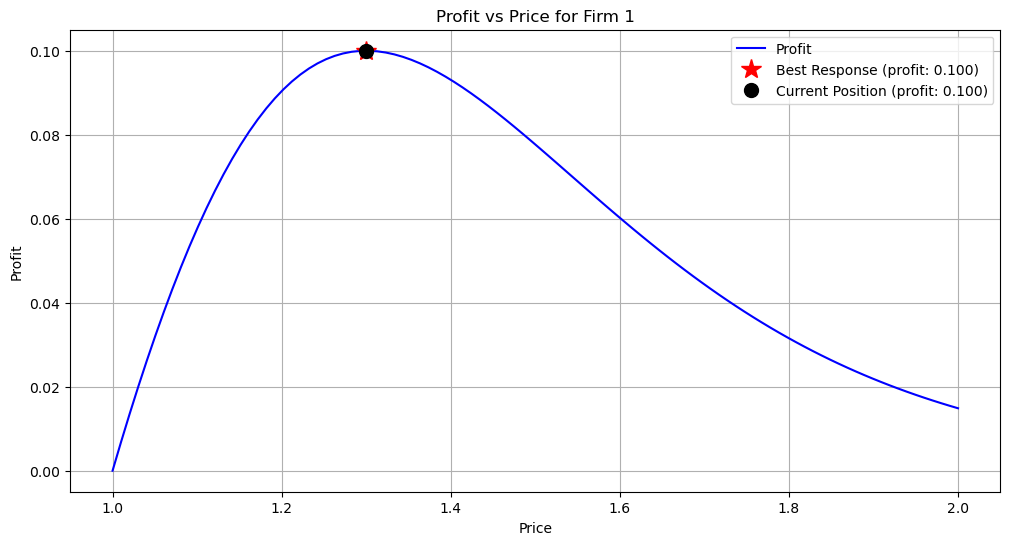

{'best_response': {'value': 1.3000018661500405, 'profit': 0.09999999999710558}, 'current': {'value': 1.3, 'profit': 0.10000000000001197}}


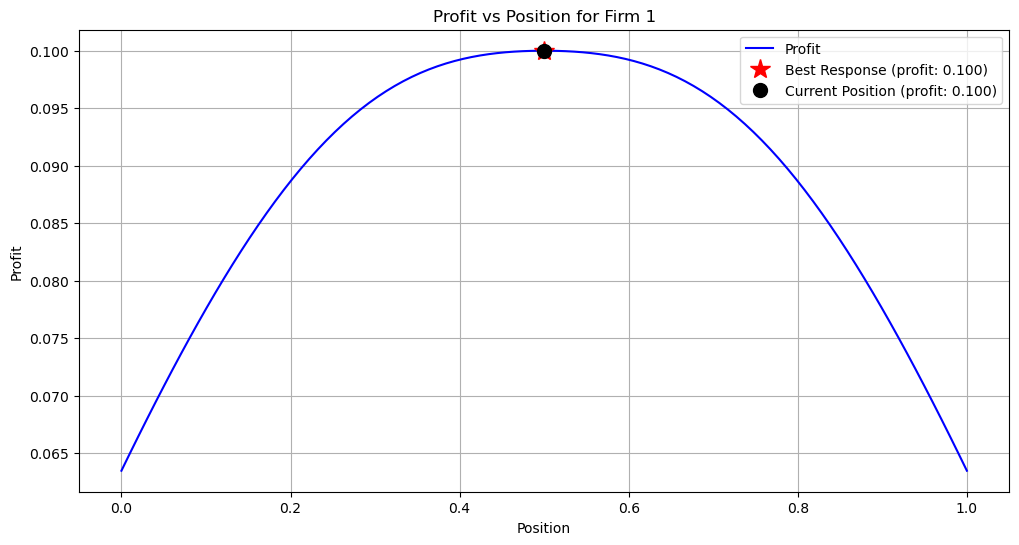

{'best_response': {'value': 0.49995460704595546, 'profit': 0.10000000057237911}, 'current': {'value': 0.5, 'profit': 0.10000000000001197}}


In [19]:
N=3
beta=5.0  # Higher beta means sharper market share boundaries
cost=1.0  # Production cost
pi=1.0    # PPP intensity
model = LinearModel(
    N=N, beta=beta, cost=cost, pi=pi,
    firms=creatAggregation(N, cost, beta)
)
model

print(model.plot_profit_curve(0))
print(model.plot_profit_curve(0, vary_price=False))

In [ ]:
betas = np.linspace(2,4,10)
N=5
cost=1.0
pi=1.0 

BR = []

for beta in betas:
    print(f"{float(beta):.3f}")
    model = LinearModel(
        N=N, beta=beta, cost=cost, pi=pi,
        firms=creatAggregation(N, cost, beta)
    )
    BR.append(model.best_response(0))

2.000
2.222
2.444
2.667
2.889
3.111


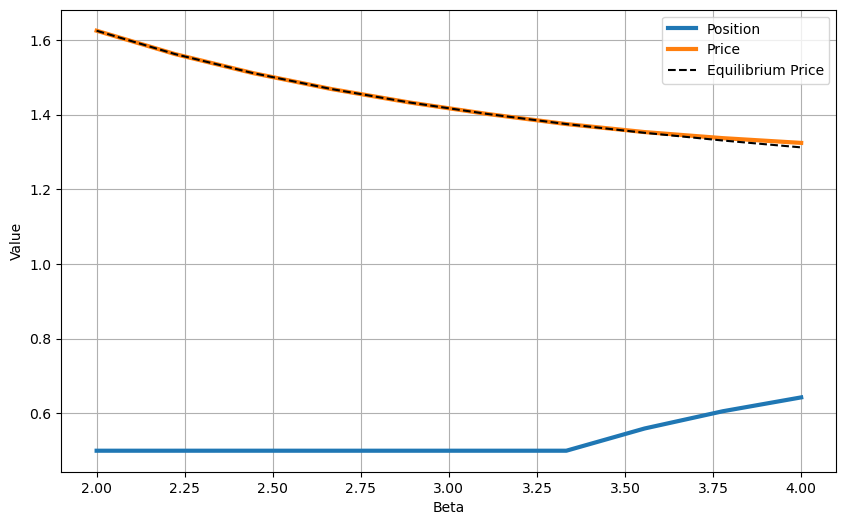

In [10]:
# Extract positions and prices from BR list
positions = [br[0][0] for br in BR]  # Assuming position is a 1D array and we want first component
prices = [br[1] for br in BR]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(betas, positions, color='#1f77b4', label='Position', lw=3)  # Default matplotlib blue
plt.plot(betas, prices, color='#ff7f0e', label='Price', lw=3)      # Default matplotlib orange
plt.plot(betas, [cost + N/(beta * (N-1)) for beta in betas], 'k--', label='Equilibrium Price')  # Black dashed line

# Add labels and title
plt.xlabel('Beta')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [166]:
N=3
beta=5.0  # Higher beta means sharper market share boundaries
cost=1.0  # Production cost
pi=1.0    # PPP intensity
d=2

def creatAggregation(N, c, beta, d):
    price = c + N/(beta * (N-1))
    return [Firm(np.array([1/2] * d), price) for _ in range(N)]

model = CubeModel(
    N=N, beta=beta, cost=cost, pi=pi, dimension=2,
    firms=creatAggregation(N, cost, beta, d)
)
model

CubeModel(dimension=2, beta=5.0, cost=1.0

Firms:
  1: position=[0.5 0.5], price=1.300
  2: position=[0.5 0.5], price=1.300
  3: position=[0.5 0.5], price=1.300
)

In [167]:
model.best_response(0)

(array([0.49494741, 0.4949528 ]), 1.300115106566562)

Computing for beta = 1.0
Computing for beta = 2.0
Computing for beta = 3.0
Computing for beta = 4.0
Computing for beta = 5.0
Computing for beta = 6.0
Computing for beta = 7.0
Computing for beta = 8.0
Computing for beta = 9.0
Computing for beta = 10.0


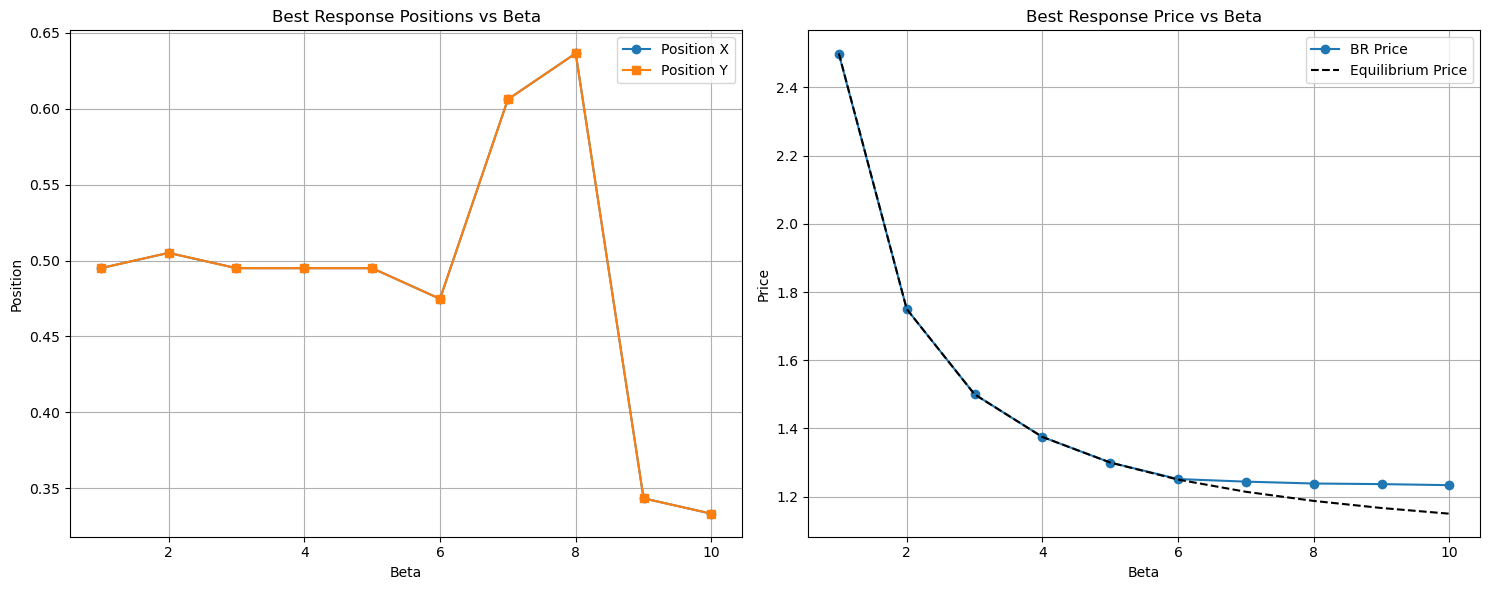

In [168]:
# Define beta values
betas = np.linspace(1, 10, 10)
N = 3
cost = 1.0
pi = 1.0
d = 2

# Lists to store results
positions_x = []
positions_y = []
prices = []

# Compute best responses for each beta
for beta in betas:
    print(f"Computing for beta = {beta}")
    model = CubeModel(
        N=N, beta=beta, cost=cost, pi=pi, dimension=2,
        firms=creatAggregation(N, cost, beta, d)
    )
    position, price = model.best_response(0)
    
    # Store results
    positions_x.append(position[0])
    positions_y.append(position[1])
    prices.append(price)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot positions
ax1.plot(betas, positions_x, color='#1f77b4', label='Position X', marker='o')
ax1.plot(betas, positions_y, color='#ff7f0e', label='Position Y', marker='s')
ax1.set_xlabel('Beta')
ax1.set_ylabel('Position')
ax1.set_title('Best Response Positions vs Beta')
ax1.legend()
ax1.grid(True)

# Plot prices
ax2.plot(betas, prices, color='#1f77b4', label='BR Price', marker='o')
ax2.plot(betas, [cost + N/(beta * (N-1)) for beta in betas], 'k--', 
         label='Equilibrium Price')
ax2.set_xlabel('Beta')
ax2.set_ylabel('Price')
ax2.set_title('Best Response Price vs Beta')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()